<h2> ======================================================</h2>
 <h1>MA477 - Theory and Applications of Data Science</h1> 
  <h1>Project 1: Linear Regression & KNN Regressor</h1> 
 
 <h4>Dr. Valmir Bucaj</h4>
 <br>
 United States Military Academy, West Point, AY20-2
<h2>=======================================================</h2>

<h2> Weight: <font color='red'>75pts</font</h2>
    
 <h2>Due Date: <font color='red'>Feb. 19th by COB</font</h2>

<hr style="height:3.2px;border:none;color:#333;background-color:#333;" />

<h3> Cadet Name:</h3>
<br>
<h3>Date: </h3>

<br>

<font color='red' size='3'> <b>$\dots \dots$</b> MY DOCUMENTATION IDENTIFIES ALL SOURCES USED AND ASSISTANCE RECEIVED IN THIS ASSIGNMENT
<br>

<b>$\dots \dots$ </b> I DID NOT USE ANY SOURCES OR ASSISTANCE REQUIRING DOCUMENATION IN COMPLETING THIS ASSIGNMENT</font>

<h3> Signature/Initials: </h3>

<hr style="height:3px;border:none;color:#333;background-color:#333;" />

<h2>Description of Project</h2>

In this project you will be working with the `incurance` dataset contained in the folder. The `insurance` dataset contains information of different people, and based on this information how much the insurance compay charges them. The ultimate goal is to predict the insurance charges for new people based on the historical information collected about each person. The features that have been collected are: `age, sex, bmi, children, smoker,` and `region`. 

You are provided with two separate sets: `insurance_train` which you will use to train your model and `insurance_test` which you will use to generate the predictions. Once you generate the predictions, you should save the results on an excel file and submit that to me. 

The project will be broken into two main parts: The <b>Analysis</b> and <b> Best Model</b> portions.

<h3>Analysis</h3>

The <b>Analysis</b> portion is worth <b>45pts</b>.

For this portion of the project you will be evaluated on the overall analysis of the dataset.

The rough point breakdown is as follows:

<ul>
<li>A one or two pargraph explaining what the project is about, what are the results, and the methodology: <b>10pts</b></li>

<li>Thoroughly addressing all the questions and completing all the required tasks: <b>20pts </b></li>

<li> Creativity and quality of Python code and explanation of the step-by-step code/work:<b> 15pts</b></li>
</ul>

<h4>Tasks</h4>

<ul>
    <li> Data Preprocessing: Explain how you are handling the missing data, are you scaling the data and why?</li>
    
   <li> Conduct exploratory analysis, and briefly summarize your observations and findings. Exploring your data using a variety of visual tools counts as part of exploratory analysis.</li>
        
   <li> Explain how you handled each of the qualitative features. </li>
   
   <li> What model did you pick and why? At this stage only choose between KNN Regressor and Linear Regression</li>
   
   <li>Explain the type of relationship(linear vs. non-linear) between features and response variable, and how you came to your conclusions. </li>
   
   <li> Obtain a measure of your model's variability and prediction power. Explain your method and results.</li>
   
    
 </ul>

<h3>Best Model</h3>

The <b>Best Model</b> portion is worth <b>30pts</b>.

For this portion you will exclusively be evaluated on the predictive power of your model. In this portion you will be competing with the rest of your peers for the top score. The scores will be, roughly, distributed according to the following scheme:



There are two instances where there may be significant deviations from the above grading scheme:





<table>
  <tr>
    <th>Points</th>
    <th>Criteria</th>
     </tr>
  <tr>
    <td>28-30</td>
    <td>Highest R2 Score</td>
   
  </tr>
  <tr>
    <td>26-28</td>
    <td>.25 StDevs of highest R2 score</td>
    </tr>
    
   <tr>
    <td>24-26</td>
    <td>.5 StDevs of highest R2 score</td>
  </tr>
  
  <tr>
    <td>22-24</td>
    <td>.75 StDevs of highest R2 score</td>
  </tr>
  
  <tr>
    <td>19-22</td>
    <td>1.25 StDevs of highest R2 score</td>
  </tr>
  
  <tr>
    <td>17</td>
    <td>1.75 StDevs of highest R2 score</td>
  </tr>
  
  <tr>
    <td>15</td>
    <td>2.25 StDevs of highest R2 score</td>
  </tr>
  
   <tr>
    <td>7-10</td>
    <td> 2.25+ StDevs of highest R2 score</td>
  </tr>
  
</table>

<br>


<ul>
  <li> If a student's model achieves an R2 score that is at least as high as the R2 score achieved by the model build by the instructor, then you will automatically get a $30$</li>
  <li> If the highest R2 score by a student is signigicantly smaller than the R2 score achieved by the model built by the instructor, the insturctor reserves the right to assign a max score that is significantly lower than what is stated in the grading scheme above. In this situation the rest of the scores will also be adjusted accordingly.</li>
 </ul>
 
 <h3>How to Submit?</h3>
 
 All of your work should be done in a single JupyterNotebook. You will submit to me via email a total of two files. One will be the JupyterNotebook which contains your whole work. The second file should be an excel file containing ONLY the predictions of your model on the test set `insurance_test`.

<hr style="height:3px;border:none;color:#333;background-color:#333;" />

<h1>Instructor Solution</h1>

We begin by importing some of the standard libraries.

In [304]:
import numpy as np
import pandas as pd

In [305]:
import matplotlib.pyplot as plt
import seaborn as sns

Next we read in the training set. 

In [306]:
df=pd.read_csv('insurance_train.csv')

In [307]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,52.0,female,24.130,1,yes,northwest,23887.66270
1,46.0,male,43.890,3,no,southeast,8944.11510
2,46.0,male,19.855,0,no,northwest,7526.70645
3,37.0,female,NaN,2,no,southwest,6311.95200
4,62.0,female,29.920,0,no,southeast,13457.96080


<h3> Missing Data</h3>

Befor we proceed with exploratory analysis we will check for missing data. If there is missing data, we will describe how we are handling them.

We will visually display the missing data via a heatmap.

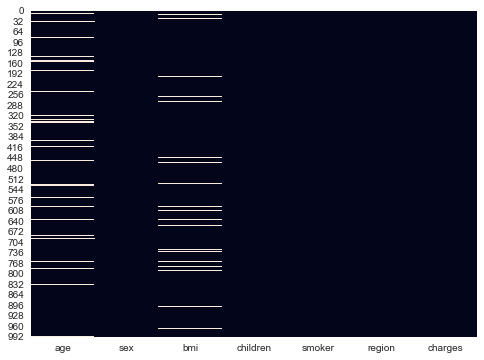

In [308]:
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull()==True, cbar=False)

Looking at the heatmap, we see that the `age` and `bmi` features are missing data. Next, we'll check how much of the data are we missing.

In [309]:
df['age'].isna().value_counts()[True]

86

In [310]:
df['bmi'].isna().value_counts()[True]/df.shape[0]

0.04885343968095713

We note that 86 or roughtly 8.5% of the subjects are missing the `age` and 49 or roughly 4.9% of the subjects are missing the `bmi` measurements. Since the percentage of the missing data is relatively low, we will proceed by imputing the data. 

Before we decide how we are going to impute the missing values, we will conduct some preliminary exploratory analysis using mainly visualization tools, to get a feel for the data. 

<h3>Exploratory Analysis</h3>

In [311]:
df.describe()

,age,bmi,children,charges
count,917.000000,954.000000,1003.000000,1003.000000
mean,39.102508,30.630425,1.083749,13263.793673
std,13.945557,6.175550,1.206670,12187.111822
min,18.000000,15.960000,0.000000,1131.506600
25%,27.000000,26.220000,0.000000,4749.061450
50%,39.000000,30.300000,1.000000,9304.701900
75%,51.000000,34.595000,2.000000,16374.370350
max,64.000000,53.130000,5.000000,63770.428010


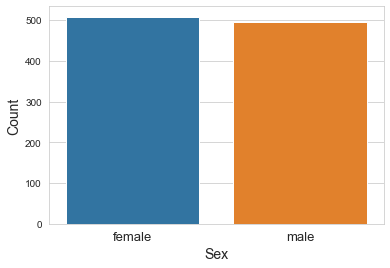

In [320]:
sns.set_style('whitegrid')
sns.countplot(df['sex'])
plt.xlabel("Sex",fontsize=14)
plt.ylabel("Count",fontsize=14)
plt.xticks(fontsize=13)
plt.show()

(array([0, 1]), <a list of 2 Text xticklabel objects>)

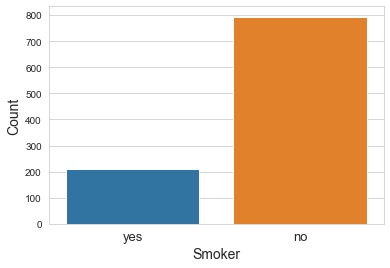

In [321]:
sns.countplot(df['smoker'])
plt.xlabel("Smoker",fontsize=14)
plt.ylabel("Count",fontsize=14)
plt.xticks(fontsize=13)

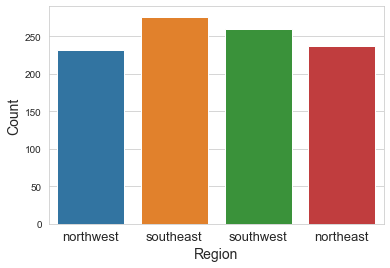

In [323]:
sns.countplot(df['region'])
plt.xlabel("Region",fontsize=14)
plt.ylabel("Count",fontsize=14)
plt.xticks(fontsize=13)
plt.show()

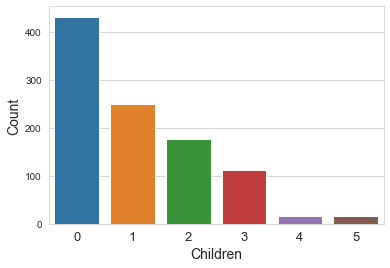

In [324]:
sns.countplot(df['children'])
plt.xlabel("Children",fontsize=14)
plt.ylabel("Count",fontsize=14)
plt.xticks(fontsize=13)
plt.show()

So far we have a good idea of the composition of our data. Specifically, we have learned that we have an essentially equal gender composition in our data, the different regions are essentially equally represented, the majority of our subjects are non-smokers, and that the majority of the subjects have at most one kid.

Next, via a few boxplots we will explore whether there is a difference in the insurance charges between different groups. This, alone, will give us a much better idea of the possible differences in insurance charges by gender, region, smoker vs non-smoker and based off the number of children.

First, let's look at the overall distribution of the charges in the entire dataset

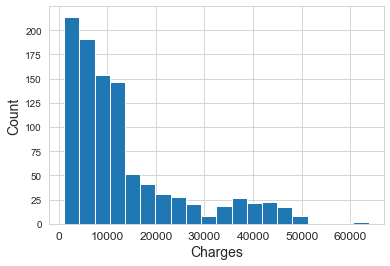

In [326]:
plt.hist(df['charges'],bins=20)
plt.xlabel("Charges",fontsize=14)
plt.ylabel("Count",fontsize=14)
plt.xticks(fontsize=12)
plt.show()
plt.show()

C:\Users\valmir.bucaj\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\valmir.bucaj\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


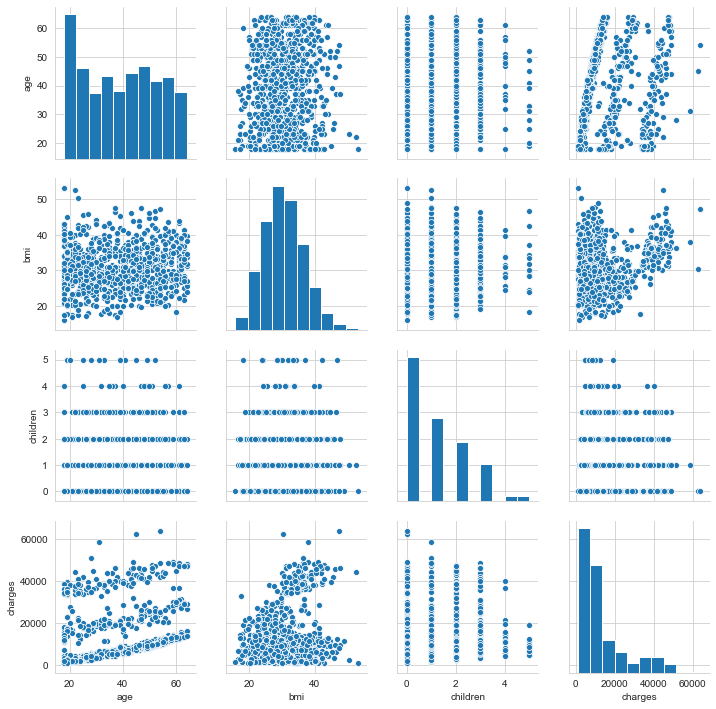

In [115]:
sns.pairplot(df)

As we can see, there are major differences in insurance charges, so it is reasonable to further explore where exactly those differences lie. The distribution appears to be almost bimodal.

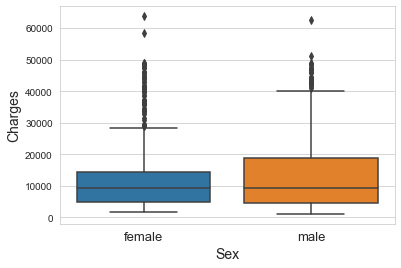

In [327]:
sns.boxplot(x='sex',y='charges',data=df)
plt.xlabel("Sex",fontsize=14)
plt.ylabel("Charges",fontsize=14)
plt.xticks(fontsize=13)
plt.show()

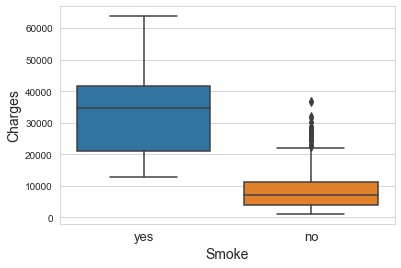

In [328]:
sns.boxplot(x='smoker',y='charges',data=df)
plt.xlabel("Smoke",fontsize=14)
plt.ylabel("Charges",fontsize=14)
plt.xticks(fontsize=13)
plt.show()

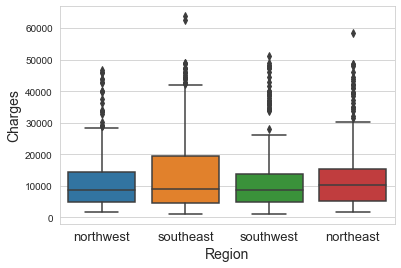

In [329]:
sns.boxplot(x='region',y='charges',data=df)
plt.xlabel("Region",fontsize=14)
plt.ylabel("Charges",fontsize=14)
plt.xticks(fontsize=13)
plt.show()

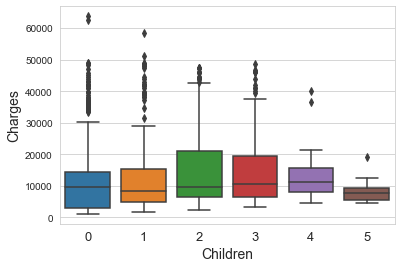

In [330]:
sns.boxplot(x='children',y='charges',data=df)
plt.xlabel("Children",fontsize=14)
plt.ylabel("Charges",fontsize=14)
plt.xticks(fontsize=13)
plt.show()

So, what did we learn so far? Overall, we learned that there appears not to be a major difference in insurance charges among the different reagions, or differeng gender groups, or even (with minor exceptions) among people with different number of kids. One major difference appears to be among smokers and non-smokers. Specifically, smokers tend to have significantly higher insurance charges. In fact, combining the boxplot with smoker vs. non-smoker and the histogram of the overall charges, we can quickly conclude, that (with a few minor exceptions) the tail of the distribution of the charges is almost exclussively due to the smokers. Namely, that tail consist of almost all smokers. 


Next, since we need to decide how to impute the age and bmi features, we will further explore whether there is a major difference of these two features within different groups. If there is a major difference between different groups, this will help us decide how to carry out the imputation as well.

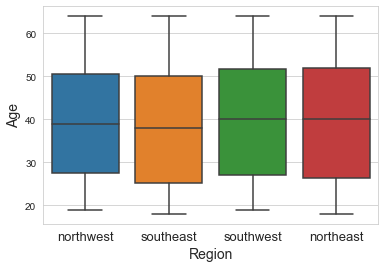

In [331]:
sns.boxplot(x='region',y='age',data=df)
plt.xlabel("Region",fontsize=14)
plt.ylabel("Age",fontsize=14)
plt.xticks(fontsize=13)
plt.show()

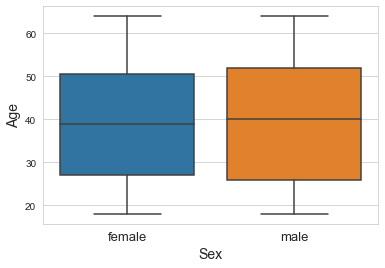

In [332]:
sns.boxplot(x='sex',y='age',data=df)
plt.xlabel("Sex",fontsize=14)
plt.ylabel("Age",fontsize=14)
plt.xticks(fontsize=13)
plt.show()

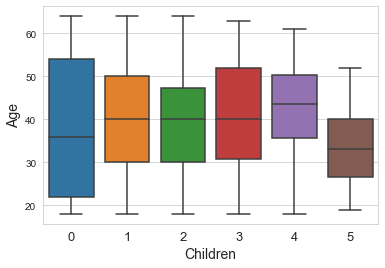

In [333]:
sns.boxplot(x='children',y='age',data=df)
plt.xlabel("Children",fontsize=14)
plt.ylabel("Age",fontsize=14)
plt.xticks(fontsize=13)
plt.show()

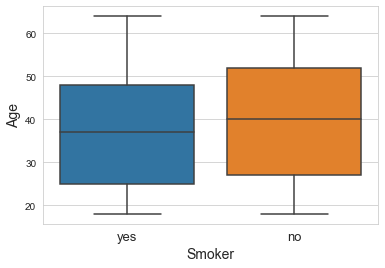

In [334]:
sns.boxplot(x='smoker',y='age',data=df)
plt.xlabel("Smoker",fontsize=14)
plt.ylabel("Age",fontsize=14)
plt.xticks(fontsize=13)
plt.show()

So, what did we learn that could potentially help us with imputation of the age column? 

Looking at the boxplots, we see that the major difference in the age seems to be among people who have 0 children vs. people who have 1-3 children, people with 4 children, and the ones with 5 children.

So, if we wanted to take a simple approach in imputing the data, we could replace the missing data with the mean of each respective group. In other words, if a person has zero children and is missing his/her age, we replace that with the mean of the group of people who have zero kids. Similarly, if a peson has 4 kids, and is missing the age, we replace that with the mean of the group of the people who have 4 kids. 

Another, slightly more sophisticated way of imputing, and which we will apply in this project is very similar to the method described above, but instead of imputing each missing data with the mean of the respective group, we will first build a distribution for each of the respective groups and then impute the missing values with the ones randomly sampled from each of these distributions. 

Of course, there are other ways of imputing, which we may see later on, for example one may begin by applying a machine-learning model first, such as KNN to help us generate the appropriate values to be imputed. 

For now, let's continue with a similar analysis for the bmi feature. 


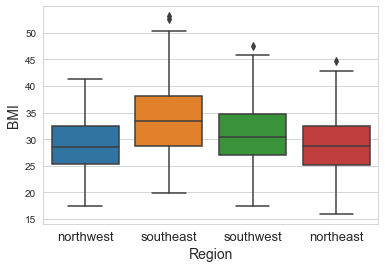

In [335]:
sns.boxplot(x='region',y='bmi',data=df)
plt.xlabel("Region",fontsize=14)
plt.ylabel("BMI",fontsize=14)
plt.xticks(fontsize=13)
plt.show()

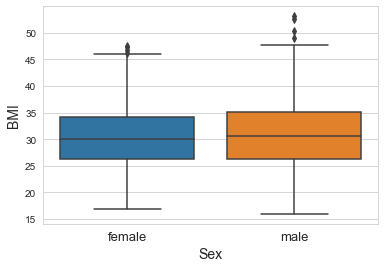

In [336]:
sns.boxplot(x='sex',y='bmi',data=df)
plt.xlabel("Sex",fontsize=14)
plt.ylabel("BMI",fontsize=14)
plt.xticks(fontsize=13)
plt.show()

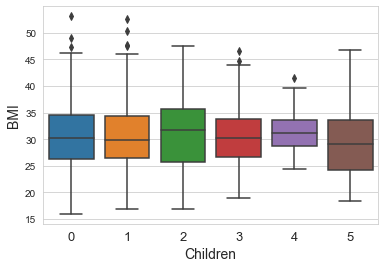

In [337]:
sns.boxplot(x='children',y='bmi',data=df)
plt.xlabel("Children",fontsize=14)
plt.ylabel("BMI",fontsize=14)
plt.xticks(fontsize=13)
plt.show()

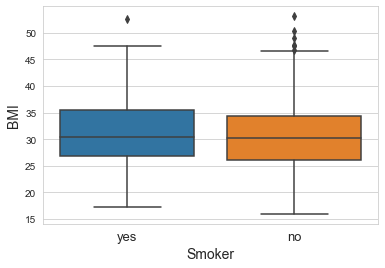

In [338]:
sns.boxplot(x='smoker',y='bmi',data=df)
plt.xlabel("Smoker",fontsize=14)
plt.ylabel("BMI",fontsize=14)
plt.xticks(fontsize=13)
plt.show()

The biggest difference we notice (though not super significant) seems to be on bmi between the different regions. In this case as well, we are going to proceed with this simplistic way of imputation; that is, iputing the mean for each respective group.

<h2> Data Imputation</h2>

First we import the Gaussian KDE builder from SciPy

In [339]:
from scipy.stats import gaussian_kde

In [340]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,52.0,female,24.130,1,yes,northwest,23887.66270
1,46.0,male,43.890,3,no,southeast,8944.11510
2,46.0,male,19.855,0,no,northwest,7526.70645
3,37.0,female,NaN,2,no,southwest,6311.95200
4,62.0,female,29.920,0,no,southeast,13457.96080


In [341]:
def impute_values(df,column_to_impute,impute_by_category):
    n=len(df[impute_by_category].unique())
    
    #dict_val will store the unique categories in the column 'by_category'
    dict_val=dict()
    for i in range(n):
        dict_val['val'+str(i)]=df[impute_by_category].unique()[i]
    #print(dict_val.values())
    
    for item in dict_val.values():
        #index_to_impute will contain the indicies of the missing values in the specific category to be imputed
        index_to_impute=df[(df[impute_by_category]==item)&
                           (df[column_to_impute].isnull()==True)][column_to_impute].index
        #print(index_to_impute)
        
        #x contains the actual data of the respective category from which the distribution will be built
        x=df[(df[impute_by_category]==item)&(df[column_to_impute].isnull()==False)][column_to_impute]
        kde=gaussian_kde(x)
        
#         print(x)
#         print(kde)
#         print(kde.resample(len(index_to_impute))[0].round())
        #next we carry out the imputation
        df.loc[index_to_impute,column_to_impute]=kde.resample(len(index_to_impute))[0]
    

    

In [342]:
impute_values(df,'bmi','region')
impute_values(df,'age','children')

In [343]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,52.000000,female,24.130000,1,yes,northwest,23887.66270
1,46.000000,male,43.890000,3,no,southeast,8944.11510
2,46.000000,male,19.855000,0,no,northwest,7526.70645
3,37.000000,female,39.644091,2,no,southwest,6311.95200
4,62.000000,female,29.920000,0,no,southeast,13457.96080
5,8.582219,female,33.100000,0,no,southwest,11848.14100
6,27.000000,male,31.130000,1,yes,southeast,34806.46770
7,32.000000,male,33.820000,1,no,northwest,4462.72180
8,19.000000,male,28.400000,1,no,southwest,1842.51900
9,48.000000,female,27.265000,1,no,northeast,9447.25035


Now that the data has been imputed, we need to deal with the qualitative features next.

<h2> Qualitaive Features</h2>

We will replace the qualitative features with dummy variables as follows:

<ul>
    <li> Sex: 0=Female, 1=Male</li>
    <li> Smoker: 0=No, 1=Yes</li>
    <li>Region: 0=NW, 1=SW, 2=NE, 3=SE</li>
  </ul>

In [344]:
df=pd.get_dummies(df,columns=['sex','smoker'],drop_first=True)

In [345]:
df.head()

,age,bmi,children,region,charges,sex_male,smoker_yes
0,52.0,24.130000,1,northwest,23887.66270,0,1
1,46.0,43.890000,3,southeast,8944.11510,1,0
2,46.0,19.855000,0,northwest,7526.70645,1,0
3,37.0,39.644091,2,southwest,6311.95200,0,0
4,62.0,29.920000,0,southeast,13457.96080,0,0


In [346]:
df['region']=df['region'].apply(lambda x: 0 if x=='northwest' else 1 if x=='southwest' else 2 if x=='northeast' else 3)

In [347]:
df.head()

,age,bmi,children,region,charges,sex_male,smoker_yes
0,52.0,24.130000,1,0,23887.66270,0,1
1,46.0,43.890000,3,3,8944.11510,1,0
2,46.0,19.855000,0,0,7526.70645,1,0
3,37.0,39.644091,2,1,6311.95200,0,0
4,62.0,29.920000,0,3,13457.96080,0,0


In [348]:
X=df.drop('charges',axis=1)
y=df['charges']

In [349]:
X.head()

,age,bmi,children,region,sex_male,smoker_yes
0,52.0,24.130000,1,0,0,1
1,46.0,43.890000,3,3,1,0
2,46.0,19.855000,0,0,1,0
3,37.0,39.644091,2,1,0,0
4,62.0,29.920000,0,3,0,0


<h3>Scaling Data</h3>

Since the data values have different units, it is best advised to scale the data. We will rescale our data to have mean zero and standard deviation one.

In [350]:
from sklearn.preprocessing import StandardScaler

In [351]:
scaler=StandardScaler()

In [352]:
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [353]:
mean=scaler.mean_
std=scaler.scale_

In [354]:
scaled=scaler.transform(X)

In [355]:
X_sc=pd.DataFrame(scaled,columns=X.columns, index=X.index)

In [356]:
X_sc.head()

,age,bmi,children,region,sex_male,smoker_yes
0,0.927393,-1.053587,-0.069439,-1.387705,-0.987122,1.949113
1,0.499186,2.113552,1.588841,1.287250,1.013046,-0.513054
2,0.499186,-1.738785,-0.898580,-1.387705,1.013046,-0.513054
3,-0.143123,1.433016,0.759701,-0.496054,-0.987122,-0.513054
4,1.641070,-0.125564,-0.898580,1.287250,-0.987122,-0.513054


<h2>Model Development</h2>

In what follows we will build different machine-learning models, tune the parmaeters using cross-validation, and select the one with the highest performance.

In [357]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.metrics import r2_score

In [358]:
from sklearn.model_selection import cross_validate, KFold
from collections import defaultdict

<h3> KNN</h3>

In [361]:
kf=KFold(n_splits=10, shuffle=True, random_state=11)

knn_r2=defaultdict(list)
for metric in ['uniform','distance']:
    for i in range(1,50):
        #kf=KFold(n_splits=5, shuffle=True, random_state=i+1)
        knn=KNeighborsRegressor(n_neighbors=i,weights=metric)
        cv_knn=cross_validate(knn,X_sc,y,cv=kf,scoring={'r2'},return_estimator=True)
        knn_r2[metric].append(cv_knn['test_r2'].mean())
    

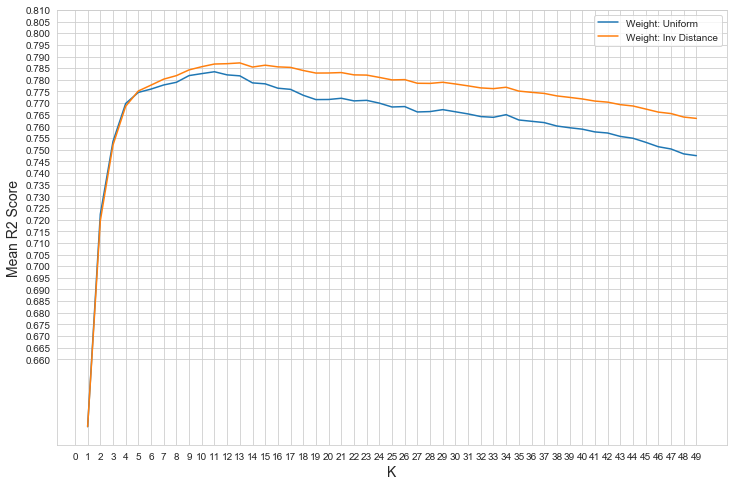

In [362]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,8))

plt.plot(range(1,50),knn_r2['uniform'], label='Weight: Uniform')
plt.plot(range(1,50), knn_r2['distance'],label="Weight: Inv Distance")
plt.xlabel("K",fontsize=14)
plt.xticks(np.arange(0,50,1))
plt.yticks(np.arange(0.66,0.81,0.005))
plt.ylabel("Mean R2 Score",fontsize=14)
plt.legend()
plt.show()

After a bit of experimentation, one finds that a $K=12$ with weight `inverse distance` provides the best model with a mean r2 score of a little over $0.785$. So, let's build this model.

In [363]:
knn_10=KNeighborsRegressor(n_neighbors=12,weights='distance')

In [364]:
cv_knn=cross_validate(knn_10,X_sc,y,cv=kf,scoring={'r2'})

In [365]:
cv_knn['test_r2'].mean()

0.78692193938642

<h2>Linear Regression</h2>

In [366]:
lr=LinearRegression()
kf_lr=KFold(n_splits=10, shuffle=True, random_state=11)
cv_lr=cross_validate(lr,X,y, cv=kf_lr,scoring={'r2'})

In [367]:
cv_lr['test_r2'].mean()

0.7318822622773218

After some experimentation with the Linear Regression, one concludes that KNN performs better than Linear Regression

<h2>Lasso</h2>

In [376]:
r2_lasso=[]
alpha_param=np.arange(0.001,180,0.5)
kf_lasso=KFold(n_splits=5, shuffle=True, random_state=1)

for param in alpha_param:
    lasso=Lasso(alpha=param)
    cv_lasso=cross_validate(lasso,X_sc,y,scoring={'r2'},cv=kf_lasso)
    r2_lasso.append(cv_lasso['test_r2'].mean())

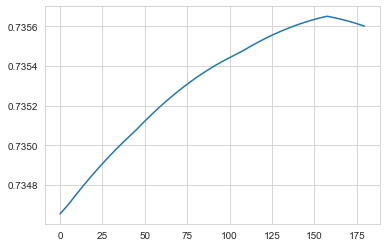

In [377]:
plt.plot(alpha_param,r2_lasso)
plt.show()

In [378]:
lasso_100=Lasso(alpha=155)


In [379]:
cv_lasso=cross_validate(lasso_100,X_sc,y,scoring={'r2'},cv=kf_lasso,return_estimator=True)

In [382]:
cv_lasso['test_r2'].mean()

0.7356451229373022

In [383]:
cv_lasso['estimator'][2].coef_

array([2994.48699209, 1988.55187068,  552.0450912 ,   -0.        ,
        -33.6056112 , 9655.08435975])

So far, KNN Regressor still appears to yeld the best results.

<h2>Ridge</h2>

In [385]:
r2_ridge=[]
alpha_param=np.arange(0.001,15,0.1)
kf_ridge=KFold(n_splits=5, shuffle=True, random_state=41)

for param in alpha_param:
    ridge=Ridge(alpha=param)
    cv_ridge=cross_validate(ridge,X_sc,y,scoring={'r2'},cv=kf_ridge)
    r2_ridge.append(cv_ridge['test_r2'].mean())

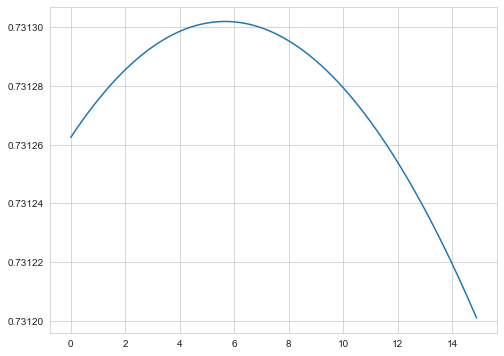

In [386]:
plt.figure(figsize=(8,6))
plt.plot(alpha_param,r2_ridge)

The best parmeter is alpha=6, however, the r2_score is below 0.75.

<h2>Conclusion</h2>

The best model seems to be KNN Regressor with $K=12$ and weight=`inverse distance`.

<h2>Validation Set</h2>

Now that we have picked and tuned a model, we will produce predictions on the test set and check the actual r2 score on that data.

In [400]:
X_test=pd.read_csv('insurance_test.csv')

In [401]:
X_test.head()

,age,sex,bmi,children,smoker,region
0,59,male,26.400,0,no,southeast
1,59,female,31.350,0,no,northwest
2,52,female,37.400,0,no,southwest
3,46,male,33.345,1,no,northeast
4,19,female,28.900,0,no,southwest


In [402]:
X_test=pd.get_dummies(X_test,columns=['sex','smoker'],drop_first=True)

In [403]:
X_test.head()

,age,bmi,children,region,sex_male,smoker_yes
0,59,26.400,0,southeast,1,0
1,59,31.350,0,northwest,0,0
2,52,37.400,0,southwest,0,0
3,46,33.345,1,northeast,1,0
4,19,28.900,0,southwest,0,0


In [404]:
X_test['region']=X_test['region'].apply(lambda x: 0 if x=='northwest' else 1 if x=='southwest' else 2 if x=='northeast' else 3)

In [405]:
X_test.head()

,age,bmi,children,region,sex_male,smoker_yes
0,59,26.400,0,3,1,0
1,59,31.350,0,0,0,0
2,52,37.400,0,1,0,0
3,46,33.345,1,2,1,0
4,19,28.900,0,1,0,0


In [407]:
#X.head()

In [408]:
scaler=StandardScaler()


scaled=scaler.fit_transform(X_test)

X_test=pd.DataFrame(scaled,columns=X_test.columns)

X_test.head()

,age,bmi,children,region,sex_male,smoker_yes
0,1.398014,-0.708632,-0.939247,1.293602,0.922404,-0.490653
1,1.398014,0.132908,-0.939247,-1.301348,-1.084124,-0.490653
2,0.897885,1.161458,-0.939247,-0.436365,-1.084124,-0.490653
3,0.469204,0.472075,-0.106846,0.428619,0.922404,-0.490653
4,-1.459864,-0.283612,-0.939247,-0.436365,-1.084124,-0.490653


In [229]:
# X_test=(X_test-mean)/std

# X_test.head()

In [409]:
knn_12=KNeighborsRegressor(n_neighbors=12,weights='distance')

In [410]:
knn_12.fit(X_sc,y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                    weights='distance')

In [411]:
knn_pred=knn_12.predict(X_test)

Finally, we check the performance of our model on the actual validation set. 

In [412]:
y_test=pd.read_csv('insurance_test_charges.csv')

In [413]:
y_test.head()

,charges
0,11743.29900
1,12622.17950
2,9634.53800
3,8334.45755
4,1743.21400


In [414]:
r2_score(y_test,knn_pred)

0.7759074058470983

<h2>Conclusion</h2>

We conclude that the test r2 score on the validation set for our model is $0.7759$. One thing to note is that the test r2 score is quite close(within 1%) to the mean r2 score we got during cross validation, which is an indication of its reliability. 